In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [2]:
file_path = '../output/state/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.0&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=2&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=3&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=4&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=5&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=2&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=3&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=4&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=5&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=1&num_tasks=15&period=[10, 100]&task_ma

In [3]:
cfg = get_config('../cfg/state_exp_cfg.json')
state_less = {}
state_wise = {}

critical_prob_list = cfg['critical_prob_list']


for state_num in cfg['num_states_list'] :
    state_less[str(state_num)] = [ 0.0 ] * len(critical_prob_list)
    state_wise[str(state_num)] = [ 0.0 ] * len(critical_prob_list)

In [4]:
critical_prob_index = {str(p): i for i, p in enumerate(critical_prob_list)}

for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_less, core_wise = get_file_avg(file_path + file)

    num_states = params['num_states']
    critical_prob = params['critical_prob']

    state_less[num_states][critical_prob_index[critical_prob]] += core_less
    state_wise[num_states][critical_prob_index[critical_prob]] += core_wise


In [5]:
print(state_less)
print(state_wise)

vis_state_num = '5'

{'1': [3.992, 4.048, 4.122, 4.184, 4.3, 4.436, 4.574, 4.752, 4.942, 5.05, 5.23], '2': [3.976, 4.096, 4.184, 4.402, 4.616, 4.76, 5.034, 5.508, 5.666, 6.096, 6.342], '3': [3.99, 4.104, 4.27, 4.418, 4.686, 4.952, 5.45, 5.748, 6.24, 6.662, 7.316], '4': [3.984, 4.086, 4.274, 4.532, 4.762, 5.042, 5.498, 5.998, 6.346, 7.018, 7.712], '5': [3.998, 4.11, 4.298, 4.564, 4.846, 5.134, 5.58, 6.096, 6.572, 7.174, 7.864]}
{'1': [3.992, 4.048, 4.122, 4.184, 4.3, 4.436, 4.574, 4.752, 4.942, 5.05, 5.23], '2': [3.976, 4.078, 4.154, 4.308, 4.478, 4.598, 4.796, 5.14, 5.212, 5.488, 5.628], '3': [3.99, 4.1, 4.232, 4.338, 4.532, 4.702, 4.97, 5.246, 5.488, 5.686, 5.99], '4': [3.984, 4.062, 4.226, 4.386, 4.572, 4.778, 5.068, 5.306, 5.52, 5.83, 6.12], '5': [3.998, 4.096, 4.25, 4.452, 4.644, 4.884, 5.136, 5.404, 5.646, 5.834, 6.168]}


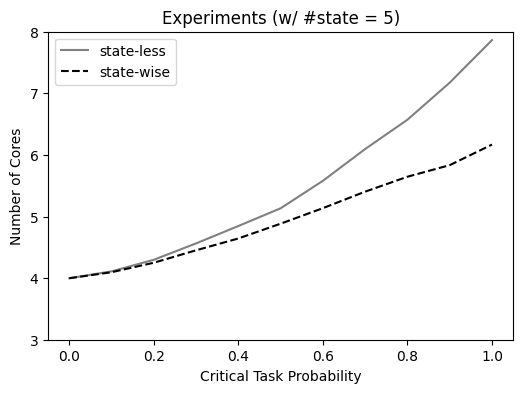

In [19]:
# Compare state-wise and state-less with criticality probability (#state = vis_state_num)


plt.figure(figsize=(6,4))

ax = plt.gca()

# plt.plot(critical_prob_list, state_less[vis_state_num], label='state-less', color='gray')

# critical_prob_list.pop(9)
# state_wise[vis_state_num].pop(9)

# plt.plot(critical_prob_list, state_wise[vis_state_num], label='state-wise', color='black', linestyle='dashed')

plt.plot(critical_prob_list, state_less[vis_state_num], label='state-less', color='gray')
plt.plot(critical_prob_list, state_wise[vis_state_num], label='state-wise', color='black', linestyle='dashed')

plt.title(f'Experiments (w/ #state = {vis_state_num})')
plt.xlabel('Critical Task Probability')
plt.ylabel('Number of Cores')
plt.legend()

ax.set_ylim([3, 8])
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

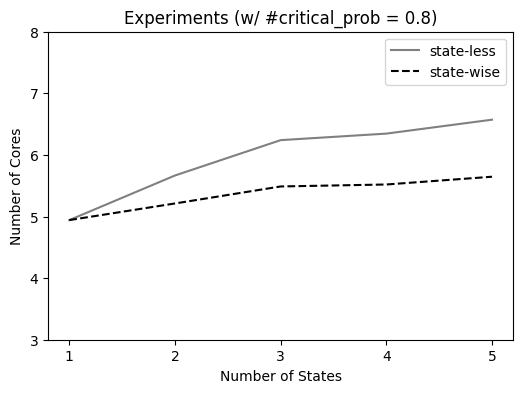

In [22]:
# Compare state-wise and state-less with #states (#critical_prob = vis_critical_prob)

vis_critical_prob = '0.8'

plt.figure(figsize=(6,4))

ax = plt.gca()

index = critical_prob_index[vis_critical_prob]
state_list = cfg['num_states_list']

def get_state_list(output_dict, index) :
    return [output_dict[str(s)][index] for s in state_list]

plt.plot(state_list, get_state_list(state_less, index), label='state-less', color='gray')
plt.plot(state_list, get_state_list(state_wise, index), label='state-wise', color='black', linestyle='dashed')

plt.title(f'Experiments (w/ #critical_prob = {vis_critical_prob})')
plt.xlabel('Number of States')
plt.ylabel('Number of Cores')
plt.legend()

ax.set_ylim([3, 8])
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# ax.yaxis.set_major_locator(plt.AutoLocator())
# ax.yaxis.set_major_locator(plt.IndexLocator(base=1, offset=0))

plt.show()